In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader
from helpers import read_hdf5, CombineDataset
from lenshelpers import Residual

from model.helpers_model import NeuralNet

import warnings
warnings.filterwarnings('ignore') 

In [2]:
config_repo_model = 'data/configFile/config_model'
ratio = 0.75
percent = 0.01
size = 1500

batch_size = 10
max_epoch = 50

opti_name = np.array(['SGD', 'SGD/momentum', 'Adam'])



res = Residual()
res.build(size, ratio = ratio, per_error = percent)

str_ID = "P"+str(int(percent*100))+"R"+str(int(ratio*100))
[final_array, metadata] = read_hdf5(str_ID, path = "data/dataSet/")
metadata ['ID'] = np.arange(0,final_array.shape[0])

----------------------------------------------------------------------------------
epoch: 1.000, auc: 0.503
epoch: 2.000, auc: 0.509
epoch: 3.000, auc: 0.522
epoch: 5.000, auc: 0.526
epoch: 6.000, auc: 0.533
epoch: 7.000, auc: 0.536
epoch: 12.000, auc: 0.538
epoch: 13.000, auc: 0.551
epoch: 14.000, auc: 0.564
epoch: 15.000, auc: 0.577
epoch: 17.000, auc: 0.579
epoch: 19.000, auc: 0.582
epoch: 20.000, auc: 0.588
Finished Training- Normalized: SGD - epoch: 20.000 - auc: 0.588 

----------------------------------------------------------------------------------
epoch: 1.000, auc: 0.496
epoch: 2.000, auc: 0.524
epoch: 5.000, auc: 0.605
epoch: 6.000, auc: 0.681
epoch: 8.000, auc: 0.703
epoch: 9.000, auc: 0.749
epoch: 10.000, auc: 0.780
epoch: 11.000, auc: 0.796
epoch: 12.000, auc: 0.797
epoch: 18.000, auc: 0.797
Finished Training- Normalized: SGD/momentum - epoch: 18.000 - auc: 0.797 

----------------------------------------------------------------------------------
epoch: 1.000, auc: 0.513

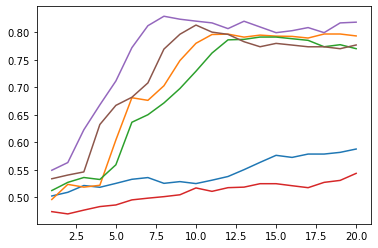

In [3]:
plt.figure()
max_epoch = 20
for norm in np.array([True, False]):
    data_set = CombineDataset(metadata,'ID','class',final_array,norm)

    data_train, data_test = train_test_split(data_set,train_size=0.9,random_state=42)


    loader_train = DataLoader(data_train, batch_size = batch_size, 
                            num_workers = 0, drop_last=True)

    loader_test = DataLoader(data_test, batch_size = batch_size, 
                            num_workers = 0, drop_last=True)


    for opti in opti_name:
        print('----------------------------------------------------------------------------------')

        test_SGDnorm = np.zeros(max_epoch)
        netbasic = NeuralNet('BasicCNN', opti)
        for epoch in range(max_epoch):
            netbasic.train(loader_train)
            res = netbasic.test(loader_test)
            test_SGDnorm[epoch] = res
        
        if norm:
            txt = "Finished Training- Normalized: "+ opti +" - epoch: {:.3f} - auc: {:.3f} \n" 
            print(txt.format(netbasic.opti_epoch, netbasic.max_met))
            plt.plot(np.arange(1, max_epoch+1), test_SGDnorm, label='Norm '+opti)
        else:
            txt = "Finished Training- Not normalized: "+ opti +" - epoch: {:.3f} - auc: {:.3f} \n" 
            print(txt.format(netbasic.opti_epoch, netbasic.max_met))
            plt.plot(np.arange(1, max_epoch+1), test_SGDnorm, label=opti)

plt.savefig('figures/optimizers.jpeg')
plt.show()